# ECE1513 practical session 5

### Learning outcomes:
    1. Create datasets using sklearn
    2. splitting data
    3. support vector machines
    4. logistic regression classifier



### datasets package - create a classificaiton [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate a linearly separable 2D dataset
X, y = make_blobs(n_samples=1000, centers=2, random_state=2)
print(X.shape)
print(y.shape)

(1000, 2)
(1000,)


In [3]:
print(X[:5])
print(y[:5])
print(set(y))

[[  1.23839154  -2.8475005 ]
 [ -1.25884111  -8.57055785]
 [ -0.86599821 -10.50446358]
 [  0.59831673  -1.06451727]
 [  2.12309797  -1.41131072]]
[1 0 0 1 1]
{0, 1}


Lets scatter our data

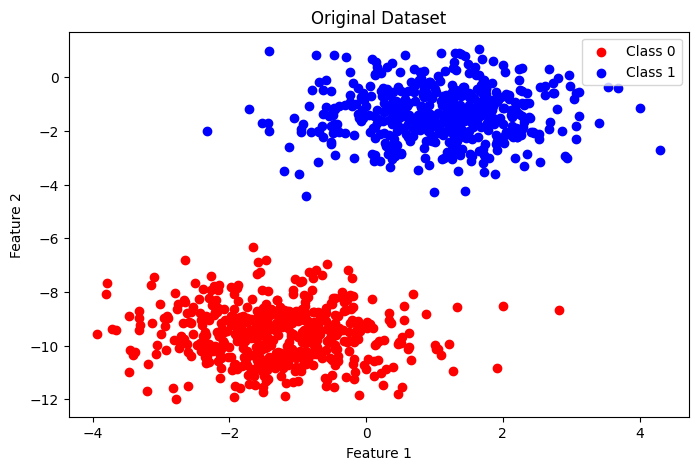

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], label='Class 0', c="red")
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], label='Class 1', c="blue")
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

### Data [splitting](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing labels shape: ", y_test.shape)

Training data shape:  (700, 2)
Training labels shape:  (700,)
Testing data shape:  (300, 2)
Testing labels shape:  (300,)


Scattering training and tetsing data

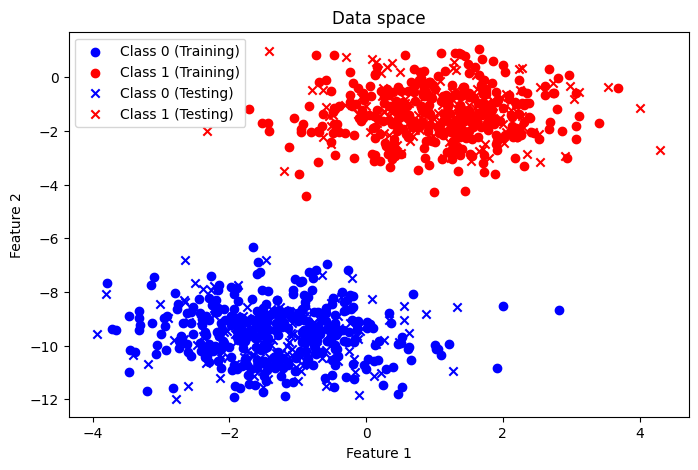

In [7]:
plt.figure(figsize=(8, 5))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1 (Training)', marker='o')
# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', label='Class 1 (Testing)', marker='x')

plt.title("Data space")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

### Training [SVMs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Mean absoulte error and mean square errors are not suitable for binary classificaiton, therefore we need [cross-entropy loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) because it directly optimizes probability outputs: $$L(y, p) = -(y log(p) + (1-y) log (1-p))$$

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss, accuracy_score
print(SVC)

<class 'sklearn.svm._classes.SVC'>


Lets try a linear kernel

In [9]:
kernel = 'linear'

# Init and fit the model
##  Produce probabilities in addition to class predictions
svm = SVC(kernel=kernel, probability= True)
svm.fit(X_train, y_train)

# Calculate training and testing accuracy
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

## Proba: logistic sigmoid applied to the signed distance of a sample from hyperplane
train_loss = log_loss(y_train, svm.predict_proba(X_train))
test_loss = log_loss(y_test, svm.predict_proba(X_test))

train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))

print(f"Linear SVM - Training Loss: {train_loss:.2f}, Testing Loss: {test_loss:.2f}")
print(f"Linear SVM - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")


Linear SVM - Training Loss: 0.00, Testing Loss: 0.00
Linear SVM - Training Accuracy: 1.00, Testing Accuracy: 1.00


In [10]:
print(svm.predict_proba(X_train)[-8:-3])
print(svm.predict(X_train)[-8:-3])

[[9.99355067e-01 6.44933496e-04]
 [2.34768776e-06 9.99997652e-01]
 [3.29532666e-07 9.99999670e-01]
 [9.99660930e-01 3.39070333e-04]
 [9.99955882e-01 4.41176319e-05]]
[0 1 1 0 0]


Lets Scatter the results

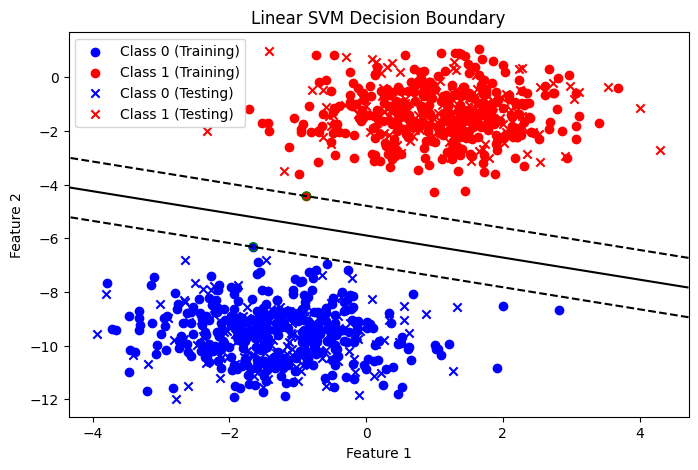

In [11]:
plt.figure(figsize=(8, 5))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', label='Class 1 (Testing)', marker='x')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], facecolors='none', edgecolors='g')
plt.title("Linear SVM Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

#### Non-lenearly separable data!
Create a non-linearly separable dataset

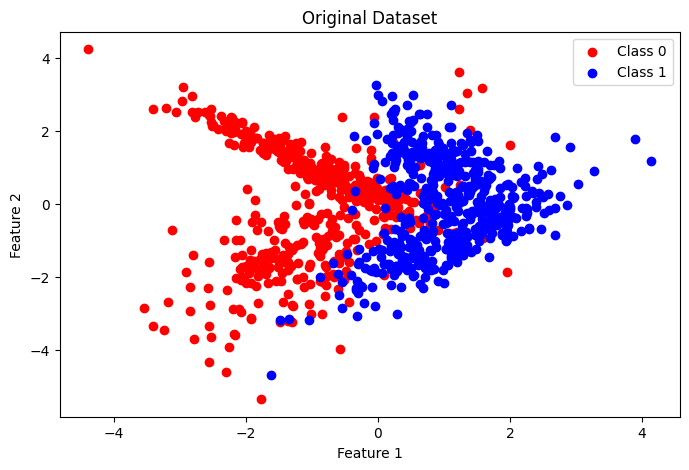

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a 2D classification dataset with overlap between the classes
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=423)
# Plot the dataset

plt.figure(figsize=(8, 5))
plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], label='Class 0', c="red")
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], label='Class 1', c="blue")
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()


In [13]:
kernel = 'linear'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Init and fit the model
svm = SVC(kernel=kernel, probability= True)
svm.fit(X_train, y_train)

# Calculate training and testing accuracy
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

train_loss = log_loss(y_train, svm.predict_proba(X_train))
test_loss = log_loss(y_test, svm.predict_proba(X_test))

train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))

print(f"Linear SVM - Training Loss: {train_loss:.2f}, Testing Loss: {test_loss:.2f}")
print(f"Linear SVM - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")


Linear SVM - Training Loss: 0.27, Testing Loss: 0.30
Linear SVM - Training Accuracy: 0.89, Testing Accuracy: 0.88


Let's Scatter the results

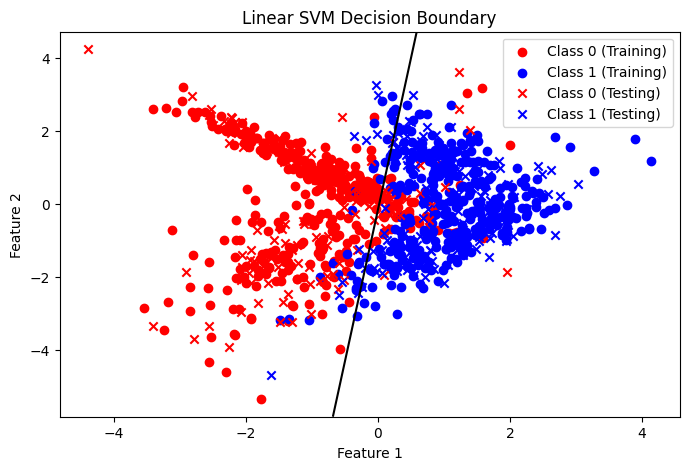

In [14]:
plt.figure(figsize=(8, 5))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='red', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='blue', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='red', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='blue', label='Class 1 (Testing)', marker='x')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels= 0, linestyles='-')
plt.title("Linear SVM Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

#### Use Polynomial kernel!
Use Non-linear SVM kernel for non-linearly separable data, for example poly kernel!

In [15]:
svm = SVC(kernel='poly', probability= True)
svm.fit(X_train, y_train)

train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

train_loss = log_loss(y_train, svm.predict_proba(X_train))
test_loss = log_loss(y_test, svm.predict_proba(X_test))

train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))

print(f"Linear SVM - Training Loss: {train_loss:.6f}, Testing Loss: {test_loss:.6f}")
print(f"Linear SVM - Training Accuracy: {train_accuracy:.6f}, Testing Accuracy: {test_accuracy:.6f}")

Linear SVM - Training Loss: 0.373302, Testing Loss: 0.495743
Linear SVM - Training Accuracy: 0.907143, Testing Accuracy: 0.913333


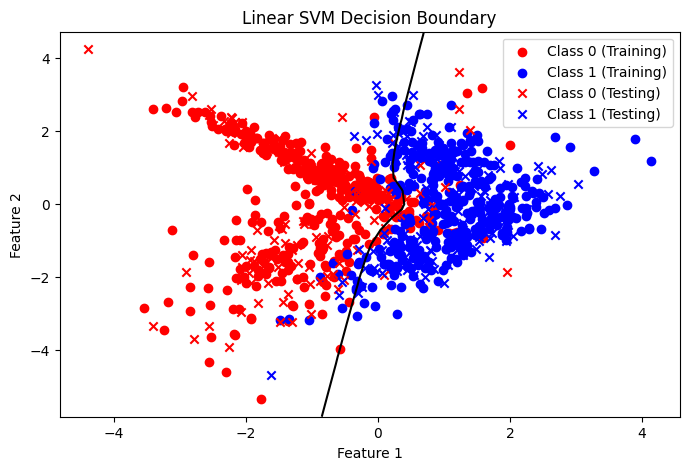

In [16]:
plt.figure(figsize=(8, 5))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='red', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='blue', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='red', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='blue', label='Class 1 (Testing)', marker='x')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], linestyles=['-'])
plt.title("Linear SVM Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

### Linear Classifier [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Linear Regression:

1. Linear regression is used when the dependent variable is continuous and has an unbounded range.
2. The output of linear regression is a continuous value, which could range from negative infinity to positive infinity.
3. It models the relationship between the independent variables and the dependent variable by fitting a linear equation to observed data.
4. Linear regression is commonly used for tasks such as predicting house prices, stock prices, or any other continuous variable.

Logistic Regression:

1. Logistic regression is used when the dependent variable is categorical. Typically, it's used for binary classification problems, although it can be extended to handle multi-class classification.
2. The output of logistic regression is a probability that the given input point belongs to a particular class. This probability is then converted into a binary outcome using a threshold (usually 0.5).
3. It models the relationship between the independent variables and the probability of a particular outcome occurring using the logistic function (sigmoid function), which constrains the output between 0 and 1.
4. Logistic regression is commonly used in various fields for tasks such as spam detection, credit risk analysis, medical diagnosis, etc.
The probability of an input taking label 1 is:
$$P(y=1∣x)=σ(\theta ^T x+b)$$
Where σ(z) is the sigmoid function, defined as:
$$σ(z)=\frac{1}{1+exp(−z)}​$$

The output of σ(z) is always between 0 and 1.


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
print(LogisticRegression)

<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Calculate training and testing loss
train_loss = log_loss(y_train, log_reg.predict_proba(X_train))
test_loss = log_loss(y_test, log_reg.predict_proba(X_test))

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

print(f"Logistic Regression - Training Loss: {train_loss:.2f}, Testing Loss: {test_loss:.2f}")
print(f"Logistic Regression - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")


Logistic Regression - Training Loss: 0.27, Testing Loss: 0.30
Logistic Regression - Training Accuracy: 0.89, Testing Accuracy: 0.87


In [38]:
print(log_reg.predict_proba(X_train)[-8:-3])
print(log_reg.predict(X_train)[-8:-3])

[[9.44717122e-01 5.52828781e-02]
 [8.38787072e-02 9.16121293e-01]
 [2.61981717e-02 9.73801828e-01]
 [9.99347823e-01 6.52176591e-04]
 [1.64218825e-02 9.83578117e-01]]
[0 1 1 0 1]


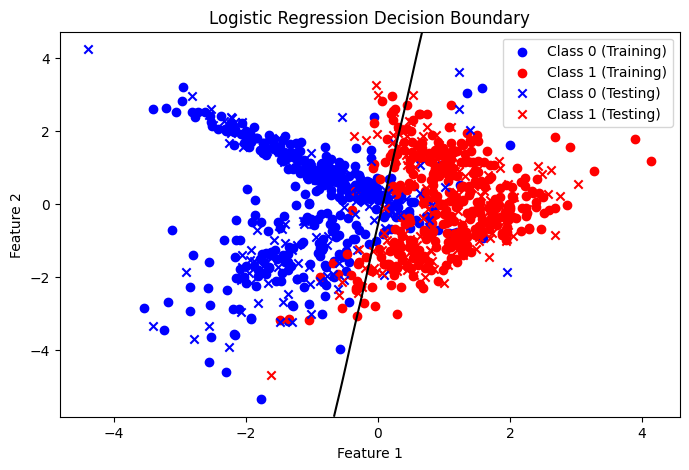

In [39]:
plt.figure(figsize=(8, 5))

# Plot training points
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0 (Training)', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1 (Training)', marker='o')

# Plot testing points
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='blue', label='Class 0 (Testing)', marker='x')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='red', label='Class 1 (Testing)', marker='x')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = log_reg.predict_proba(xy)[:, 1].reshape(XX.shape)

# Contour plot for decision boundary
ax.contour(XX, YY, Z, levels=[0.5], colors='k', linestyles='-')

plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()